In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 176. AdaBoost Coding Part One - The Data

In [2]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Axes: xlabel='class', ylabel='count'>

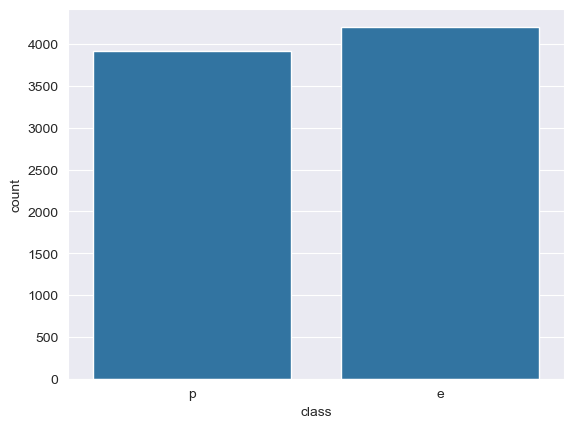

In [5]:
sns.countplot(x='class',data=df)

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
feat_uni = df.describe().transpose().reset_index().sort_values('unique')

<Axes: xlabel='unique', ylabel='index'>

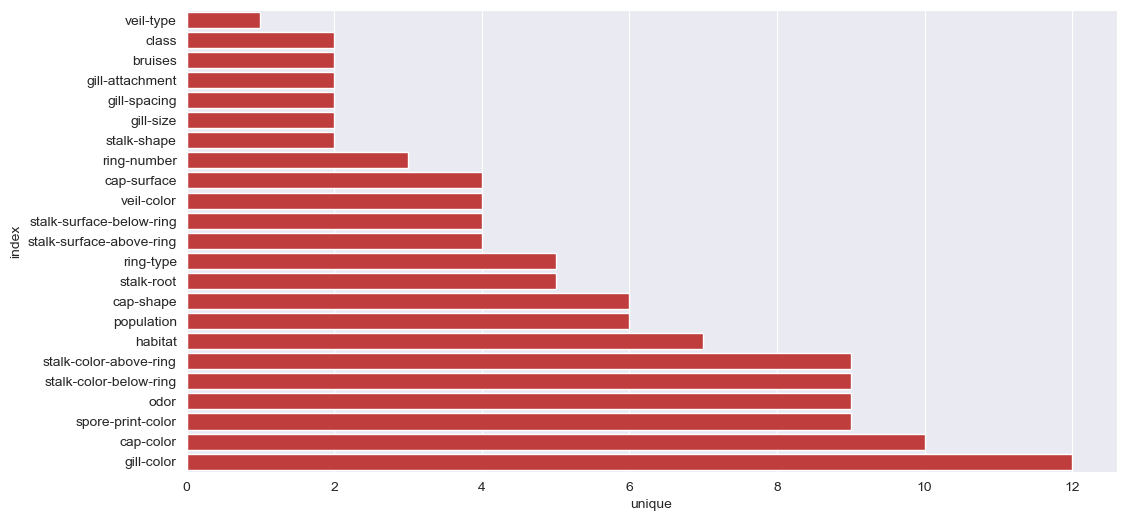

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='unique',y='index',data=feat_uni, color=sns.color_palette()[3])

In [19]:
X = df.drop('class',axis=1)

In [20]:
y = df['class']

In [22]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [23]:
X = pd.get_dummies(X, drop_first=True)

In [25]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# 177. AdaBoost Coding Part Two - The Model

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [33]:
model = AdaBoostClassifier(n_estimators=1, algorithm='SAMME')

In [34]:
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1)

In [41]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [36]:
predictions = model.predict(X_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [38]:
accuracy_score(y_test,predictions)

0.8777686628383922

In [48]:
confusion_matrix(y_test,predictions, labels=['e','p'])

array([[529, 126],
       [ 23, 541]], dtype=int64)

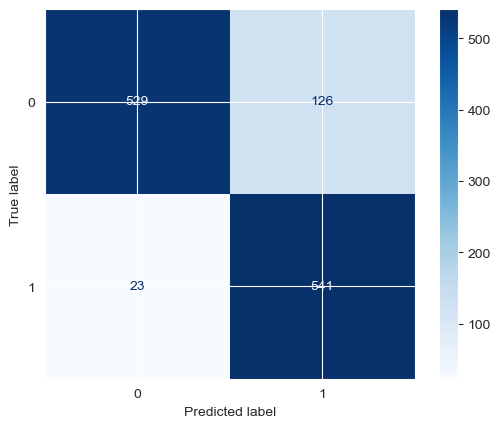

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot(cmap='Blues')

In [39]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
model.feature_importances_.argmax()

22

In [49]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

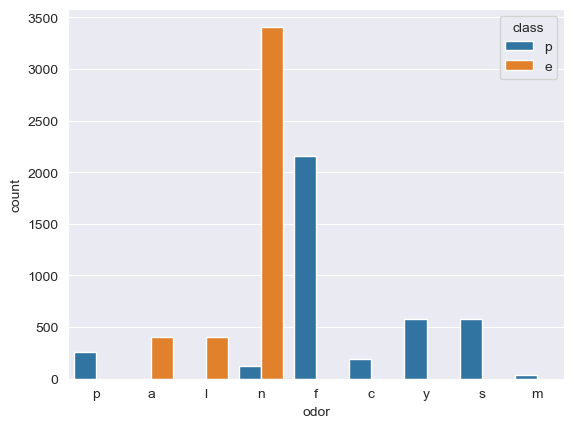

In [53]:
sns.countplot(x='odor',data=df, hue='class')

In [54]:
len(X.columns)

95

In [55]:
error_rates = []

for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    error_rates.append(err)

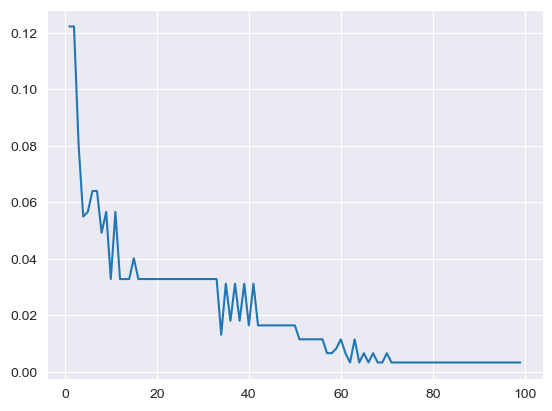

In [56]:
plt.plot(range(1,100),error_rates)

In [57]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=99)

In [58]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0839286 , 0.14837301,
       0.03159851, 0.        , 0.07280025, 0.08196834, 0.        ,
       0.        , 0.        , 0.01388889, 0.0605164 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02166971, 0.        , 0.01879133, 0.        , 0.        ,
       0.03973033, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0356175 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02248036, 0.        , 0.     

In [59]:
features = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [60]:
features

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [61]:
imp_feats = features[features['Importance'] > 0]

In [63]:
imp_feats

,Importance
odor_c,0.083929
odor_f,0.148373
odor_l,0.031599
odor_n,0.072800
odor_p,0.081968
gill-spacing_w,0.013889
gill-size_n,0.060516
stalk-shape_t,0.021670
stalk-root_c,0.018791
stalk-surface-above-ring_k,0.039730


<Axes: xlabel='Importance', ylabel='None'>

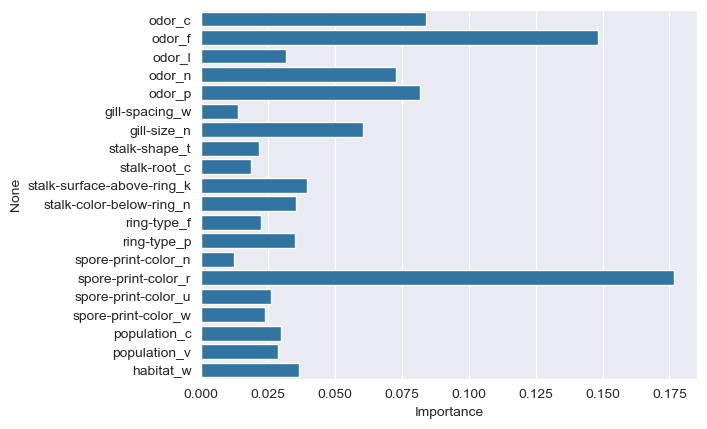

In [64]:
sns.barplot(x='Importance',y=imp_feats.index,data=imp_feats)

# 178. Gradient Boosting Theory

# 179. Gradient Boosting Coding Walkthrough

In [65]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [66]:
X = df.drop('class',axis=1)

In [67]:
y = df['class']

In [68]:
X = pd.get_dummies(X, drop_first=True)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.1,0.05,0.02],
              'max_depth':[3,4,5]}

In [78]:
gb_model = GradientBoostingClassifier()

In [79]:
grid = GridSearchCV(gb_model,param_grid, n_jobs=-1)

In [80]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [81]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [82]:
predictions = grid.predict(X_test)

In [84]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [85]:
grid.best_estimator_

GradientBoostingClassifier()

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



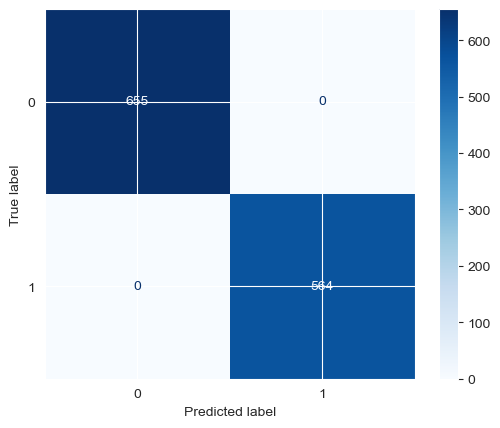

In [87]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot(cmap='Blues')

In [88]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.02433994e-17, 0.00000000e+00, 0.00000000e+00,
       3.34984435e-17, 1.04524302e-03, 1.95082914e-17, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 3.98890566e-17, 0.00000000e+00,
       6.96603038e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.37097747e-03, 5.16399179e-02, 1.84253604e-04, 1.03226377e-02,
       1.82499853e-02, 1.50441768e-04, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.28199024e-02,
       1.08588516e-02, 0.00000000e+00, 4.02794080e-16, 0.00000000e+00,
       1.30276133e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.53294854e-18, 0.00000000e+00, 6.21839114e-17, 3.19459048e-18,
       4.51753489e-04, 4.18433659e-04, 1.36082984e-01, 4.69032068e-03,
       1.32664560e-02, 1.96031898e-03, 8.52718817e-05, 4.95063766e-06,
       1.76797782e-05, 2.53703491e-04, 5.28306742e-02, 3.19125621e-03,
       0.00000000e+00, 0.00000000e+00, 5.50350499e-04, 0.00000000e+00,
      

In [89]:
features = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])

In [98]:
imp_feats = features[features['Importance'] > 0.0005]

In [100]:
imp_feats

,Importance
cap-surface_g,0.001045
cap-color_y,0.002371
bruises_t,0.051640
odor_f,0.010323
odor_l,0.018250
odor_n,0.614744
odor_p,0.003949
gill-spacing_w,0.012820
gill-size_n,0.010859
stalk-root_c,0.136083


<Axes: xlabel='Importance', ylabel='None'>

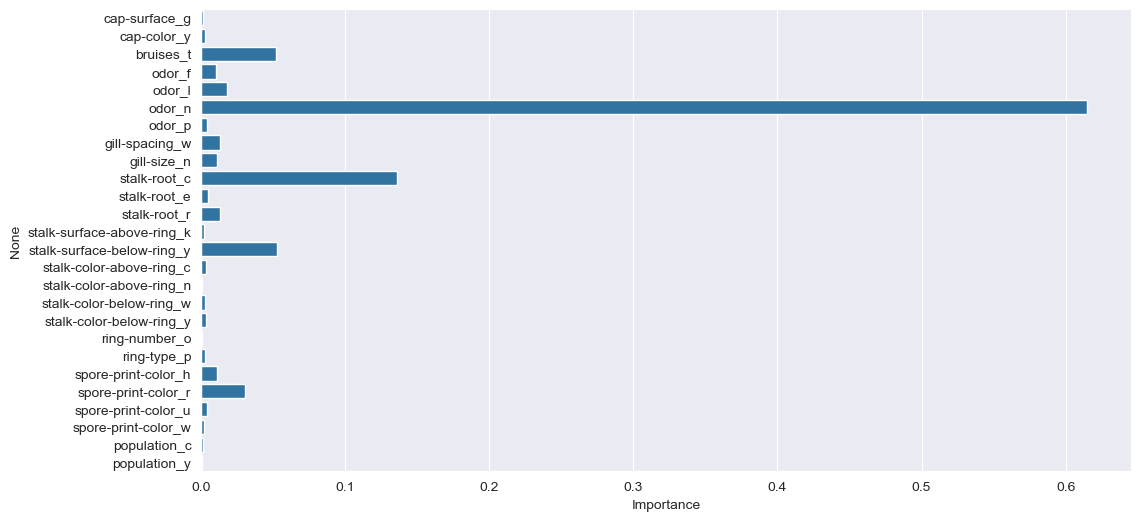

In [101]:
plt.figure(figsize=(12,6))
sns.barplot(x='Importance',y=imp_feats.index,data=imp_feats)